# Netflix stock Analysis Project

## Objectives:
1. Volume of Stock traded
2. Netflix stock price - High, open, close
3. Netflix stock price - Day, month, year wise
4. Top 5 dates with highest Score
5. Top 5 dates with Lowest Score

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [12]:
net=pd.read_csv("netflix_stock_synthetic.csv")

In [13]:
net.head()

,date,open,high,low,close,Adj close,volume
0,2006-12-19,10.09,10.34,9.86,10.10,10.08,11280103
1,2006-12-20,10.07,10.18,9.87,10.08,10.09,517572
2,2006-12-21,10.04,10.41,9.98,10.22,10.23,12432699
3,2006-12-22,10.23,10.56,10.11,10.54,10.54,13348499
4,2006-12-25,10.52,10.71,10.25,10.50,10.52,8959828


In [101]:
sns.set(rc={'figure.figsize':(10,5)})

In [113]:
net['date']=pd.to_datetime(net['date'])
net=net.set_index('date')
net.head(5)

,open,high,low,close,Adj close,volume
date,,,,,,
2006-12-19,10.09,10.34,9.86,10.10,10.08,11280103
2006-12-20,10.07,10.18,9.87,10.08,10.09,517572
2006-12-21,10.04,10.41,9.98,10.22,10.23,12432699
2006-12-22,10.23,10.56,10.11,10.54,10.54,13348499
2006-12-25,10.52,10.71,10.25,10.50,10.52,8959828


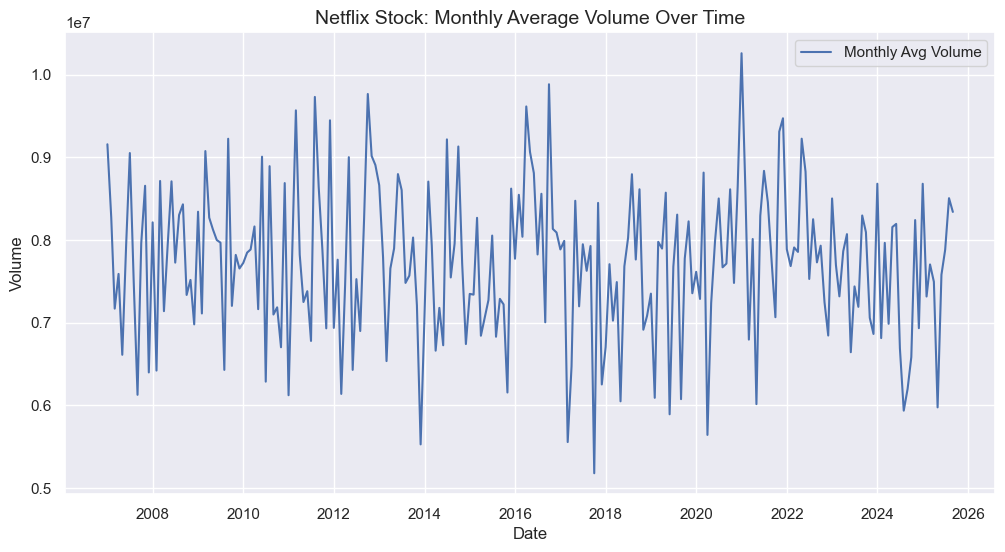

In [94]:
# Resample by month and take mean volume
monthly_vol = net['volume'].resample('ME').mean()

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_vol.index, y=monthly_vol.values, label='Monthly Avg Volume')

plt.title("Netflix Stock: Monthly Average Volume Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()


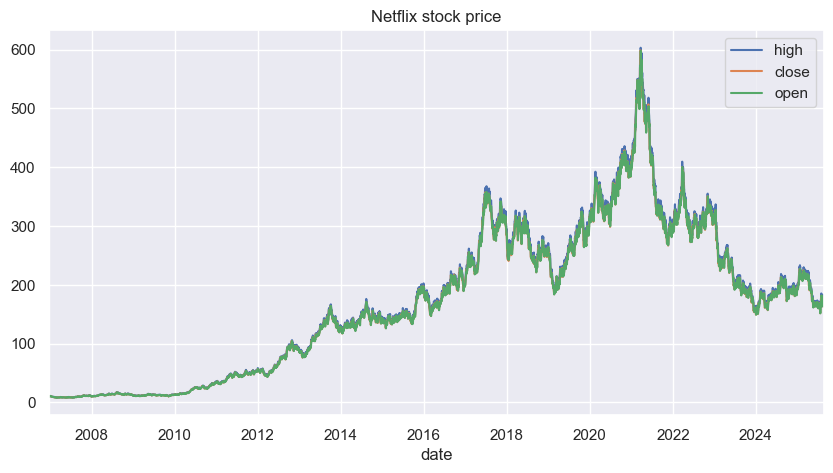

In [100]:
net.plot(y=['high','close', 'open'], title="Netflix stock price")
plt.show()

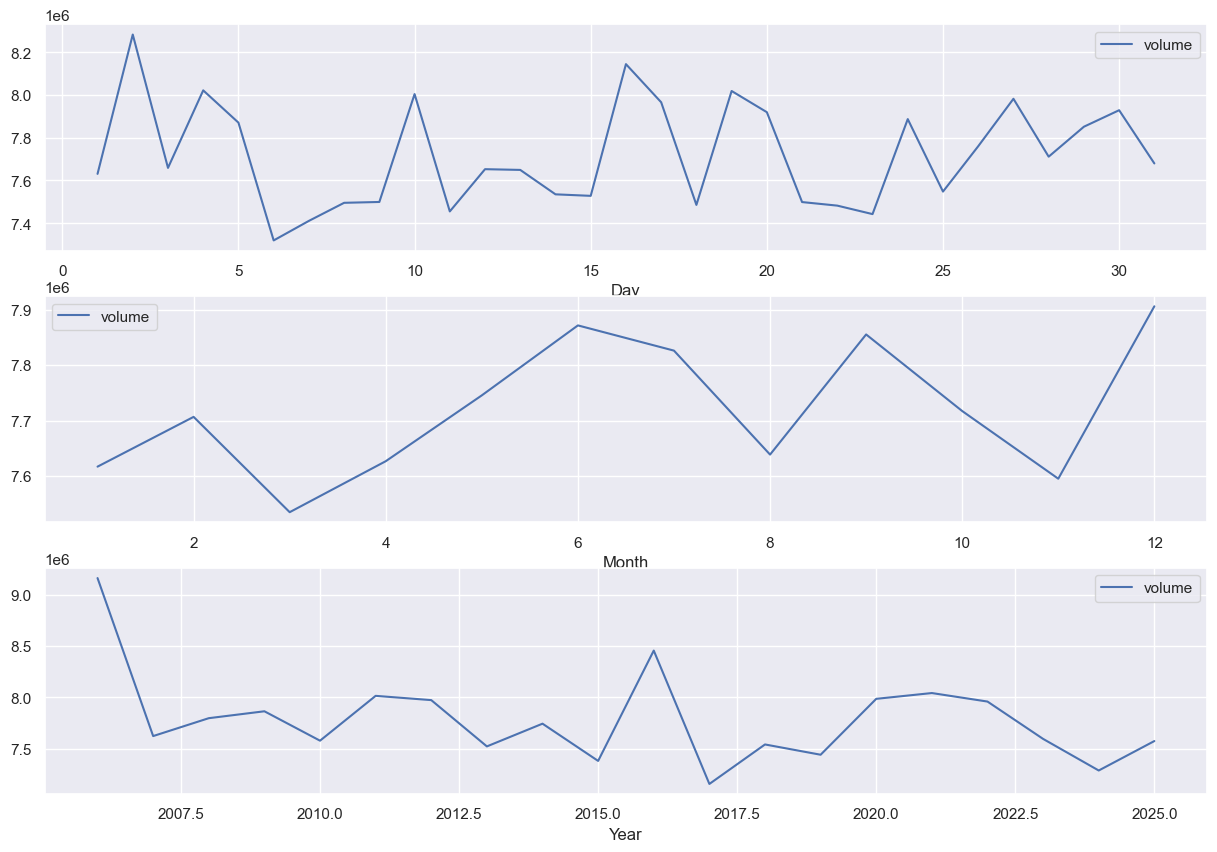

In [116]:
fig, (ax1,ax2, ax3) = plt.subplots(3,figsize = (15, 10))
net.groupby(net.index.day).mean().plot(y='volume', ax=ax1,xlabel='Day')
net.groupby(net.index.month).mean().plot(y='volume', ax=ax2,xlabel='Month')
net.groupby(net.index.year).mean().plot(y='volume', ax=ax3,xlabel='Year')
plt.show()

## Top 5 dates with higest stock price

In [14]:
net

,date,open,high,low,close,Adj close,volume
0,2006-12-19,10.09,10.34,9.86,10.10,10.08,11280103
1,2006-12-20,10.07,10.18,9.87,10.08,10.09,517572
2,2006-12-21,10.04,10.41,9.98,10.22,10.23,12432699
3,2006-12-22,10.23,10.56,10.11,10.54,10.54,13348499
4,2006-12-25,10.52,10.71,10.25,10.50,10.52,8959828
...,...,...,...,...,...,...,...
4869,2025-08-18,165.13,165.59,159.86,163.40,163.12,11480150
4870,2025-08-19,163.68,176.91,163.26,173.86,173.13,12821553
4871,2025-08-20,174.20,182.03,172.23,178.74,178.79,14188413
4872,2025-08-21,178.68,182.59,174.09,174.44,174.00,3119115


In [129]:
a=net.sort_values(by='high', ascending=False).head(5)
a['high']


date
2021-03-24    603.21
2021-03-25    602.34
2021-03-26    598.81
2021-04-02    593.94
2021-04-01    593.27
Name: high, dtype: float64

In [130]:
b=net.sort_values(by='low', ascending=True).head(5)
b['low']


date
2007-03-16    7.88
2007-05-16    7.90
2007-03-01    7.92
2007-03-19    7.96
2007-03-05    7.97
Name: low, dtype: float64

<Axes: xlabel='date', ylabel='low'>

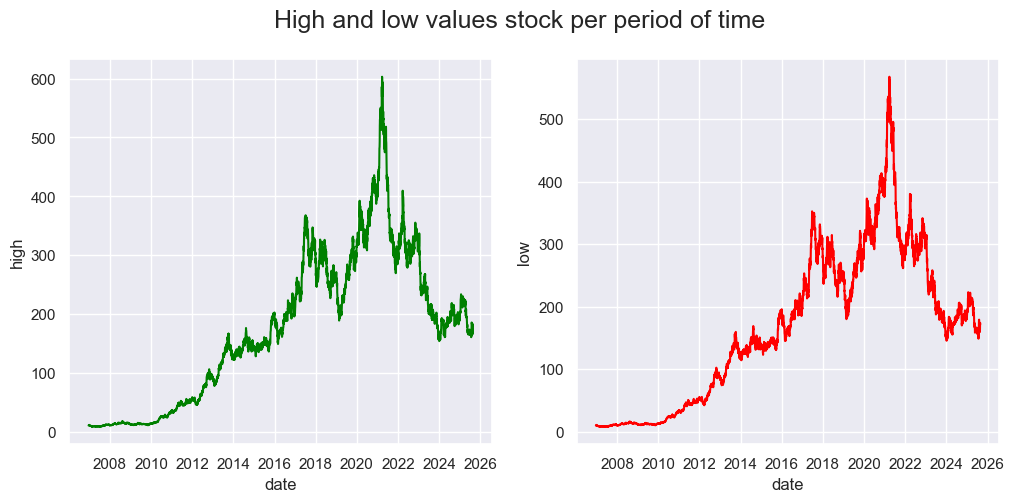

In [144]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(12, 5))
fig.suptitle('High and low values stock per period of time', fontsize=18)
sns.lineplot(ax=axes[0], y=net['high'], x=net.index, color='green')
sns.lineplot(ax=axes[1], y=net['low'], x=net.index, color='red')
